In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Load the dataset
file_path = '../sanchit/normal_train_data.csv'
data = pd.read_csv(file_path)

data.head()

,accessHours,accessDate,appCategory,permissionUsed,totalUsage,totalUsageDaily,totalUsageWeekly,rxBytesWifiHourly,txBytesWifiHourly
0,0.0,0.0,0.0,0.0,0.000000,0.078947,0.098837,0.0,0.0
1,1.0,1.0,1.0,0.0,0.333333,0.122807,0.453488,0.0,0.0
2,2.0,2.0,0.0,0.0,0.083333,0.175439,0.316860,0.0,0.0
3,0.0,3.0,0.0,0.0,0.000000,0.517544,0.206395,0.0,0.0
4,3.0,1.0,0.0,0.0,0.000000,0.201754,0.421512,0.0,0.0


In [27]:
mu = np.mean(data,axis = 0)
std = np.std(data,axis =0)

In [28]:
print(mu)
print(std)

accessHours          7.139842
accessDate           2.401055
appCategory          0.271768
permissionUsed       1.126649
totalUsage           0.075198
totalUsageDaily      0.176364
totalUsageWeekly     0.192091
rxBytesWifiHourly    0.004680
txBytesWifiHourly    0.029402
dtype: float64
accessHours          5.713842
accessDate           1.727505
appCategory          0.511111
permissionUsed       2.442975
totalUsage           0.155984
totalUsageDaily      0.215419
totalUsageWeekly     0.219999
rxBytesWifiHourly    0.052889
txBytesWifiHourly    0.124638
dtype: float64


In [29]:
file_path = '../sanchit/synthetic_anomaly_data.csv'
synthetic_data = pd.read_csv(file_path)

synthetic_data.head()

,accessHours,accessDate,appCategory,permissionUsed,totalUsage,totalUsageDaily,totalUsageWeekly,rxBytesWifiHourly,txBytesWifiHourly
0,14.0,2.0,0.0,2.0,0.0,0.0,0.007586,0.901760,1.253180
1,12.0,1.0,0.0,3.0,0.0,0.0,0.226323,0.664990,0.529202
2,4.0,3.0,0.0,2.0,0.0,0.0,0.075780,0.591162,0.896576
3,8.0,3.0,0.0,2.0,0.0,0.0,0.118325,0.866056,0.781642
4,10.0,0.0,0.0,2.0,0.0,0.0,0.444437,1.339360,1.077209


In [32]:
def z_score(data,mu,std):
    return (data - mu)/std

print(z_score(data,mu,std))
print(z_score(synthetic_data,mu,std))
    

     accessHours  accessDate  appCategory  permissionUsed  totalUsage  \
0      -1.249569   -1.389898    -0.531720       -0.461179   -0.482087   
1      -1.074556   -0.811028     1.424802       -0.461179    1.654885   
2      -0.899542   -0.232159    -0.531720       -0.461179    0.052156   
3      -1.249569    0.346711    -0.531720       -0.461179   -0.482087   
4      -0.724529   -0.811028    -0.531720       -0.461179   -0.482087   
..           ...         ...          ...             ...         ...   
374    -0.549515   -0.232159     1.424802       -0.051842   -0.482087   
375    -1.074556   -0.811028     1.424802       -0.461179    0.052156   
376     1.200621   -1.389898     1.424802       -0.461179   -0.482087   
377    -0.199488    1.504450     1.424802       -0.461179    0.319277   
378    -0.724529    1.504450    -0.531720       -0.461179   -0.482087   

     totalUsageDaily  totalUsageWeekly  rxBytesWifiHourly  txBytesWifiHourly  
0          -0.452222         -0.423880      

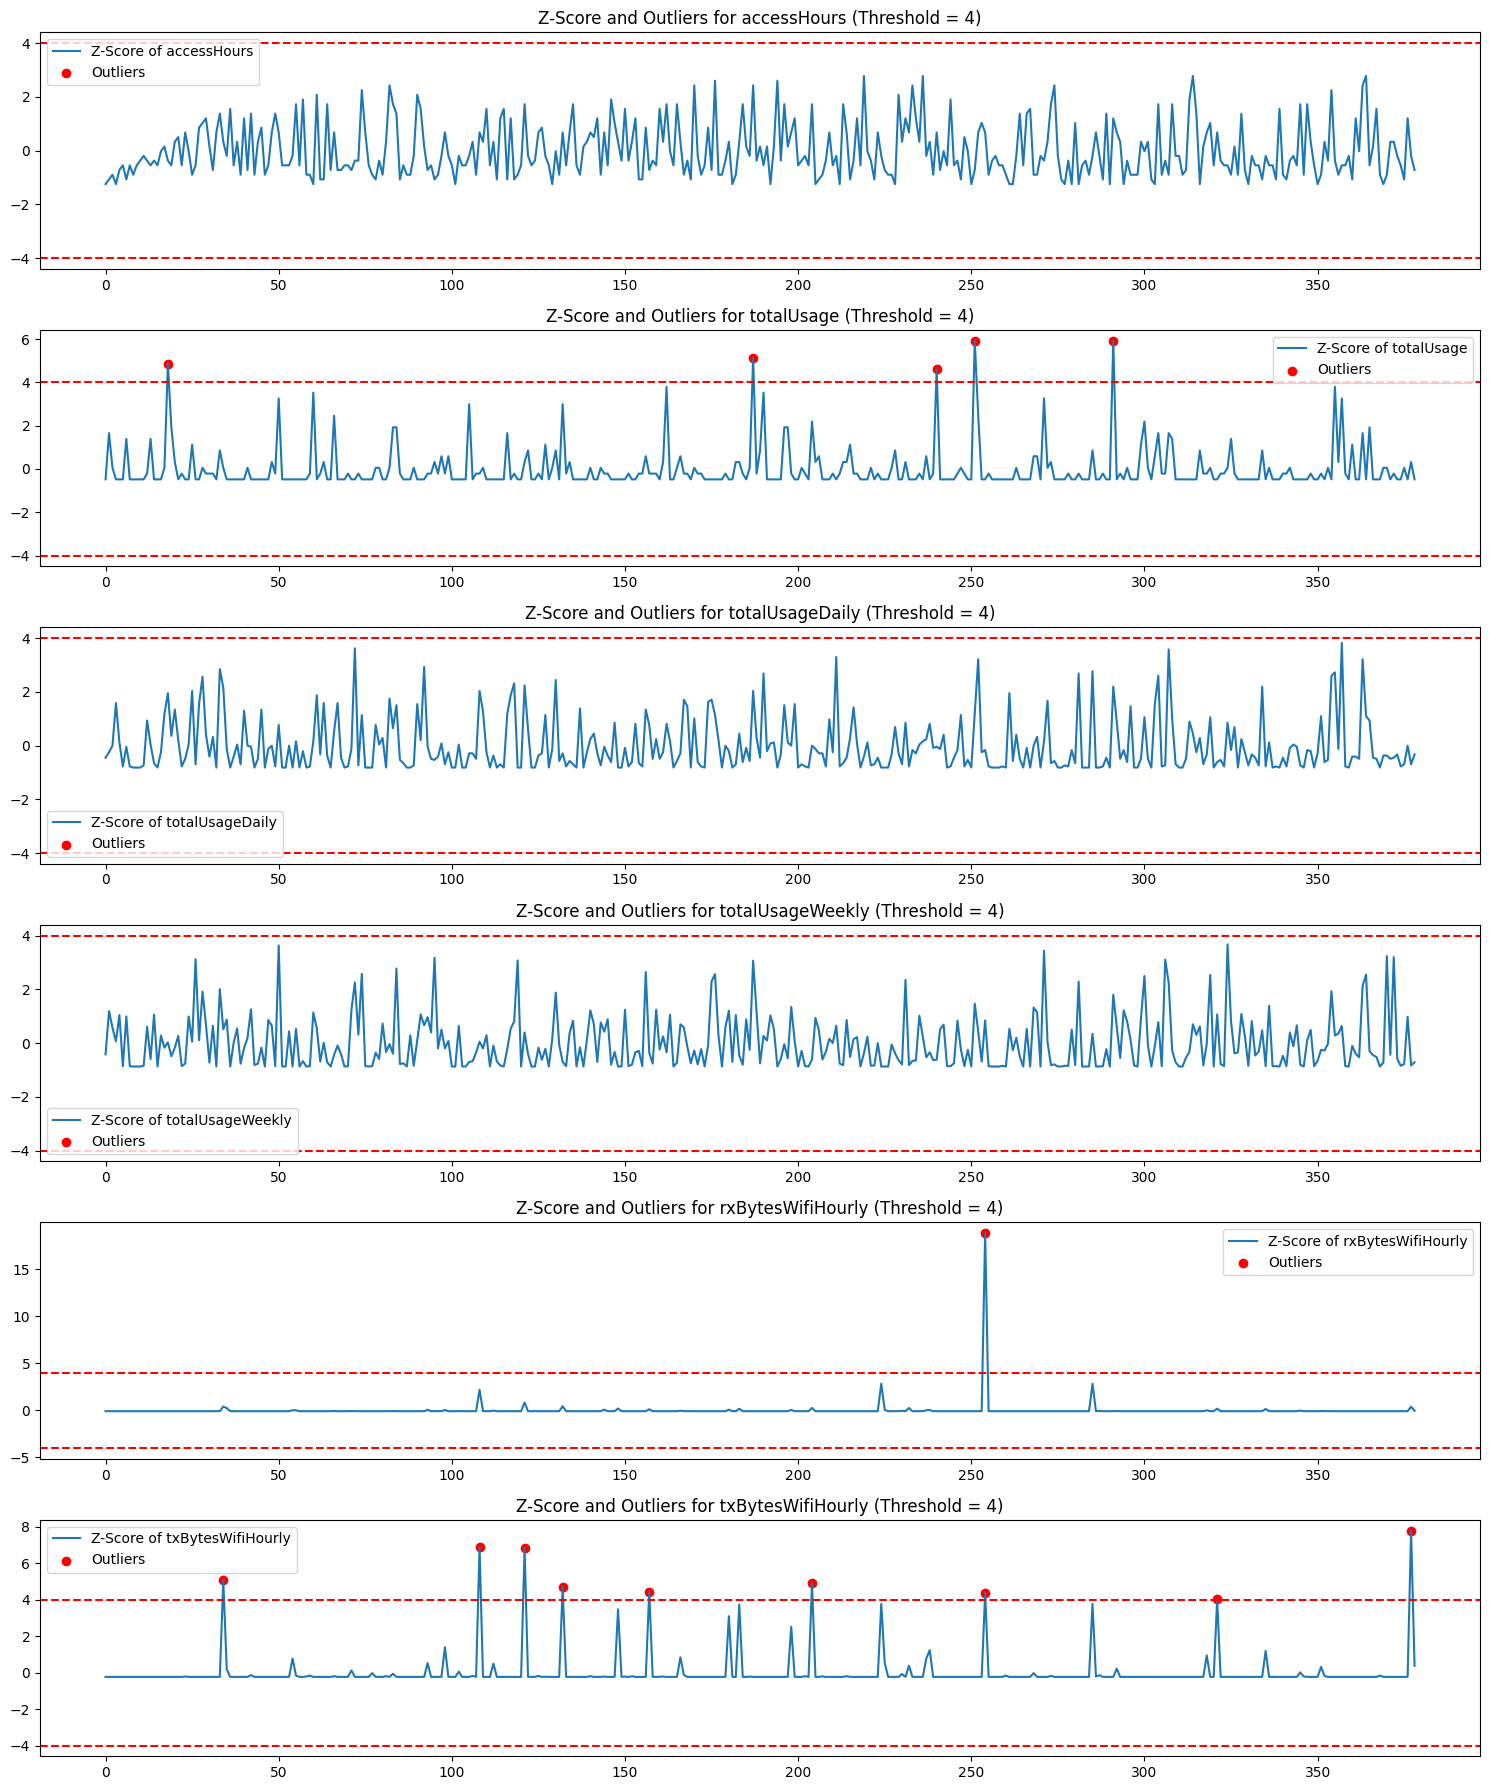

In [24]:

import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt

# Load the data

# Selecting relevant columns
columns_of_interest = ['accessHours', 'totalUsage', 'totalUsageDaily','totalUsageWeekly','rxBytesWifiHourly','txBytesWifiHourly']

# Checking for the existence of columns
existing_columns = [col for col in columns_of_interest if col in data.columns]

# Filtering the dataset to include only the existing columns of interest
filtered_data = data[existing_columns]

# Calculating z-scores
z_scores = filtered_data.apply(zscore)

outliers_threshold_2 = (z_scores > 4) | (z_scores < -4)

# Plotting outliers with the new threshold
plt.figure(figsize=(15, 18))
for i, column in enumerate(existing_columns):
    plt.subplot(len(existing_columns), 1, i + 1)
    plt.plot(z_scores[column], label=f'Z-Score of {column}')
    plt.scatter(outliers_threshold_2[column].index[outliers_threshold_2[column]], z_scores[column][outliers_threshold_2[column]], color='red', label='Outliers')
    plt.axhline(y=4, color='r', linestyle='--')
    plt.axhline(y=-4, color='r', linestyle='--')
    plt.title(f'Z-Score and Outliers for {column} (Threshold = 4)')
    plt.legend()

plt.tight_layout()
plt.show()


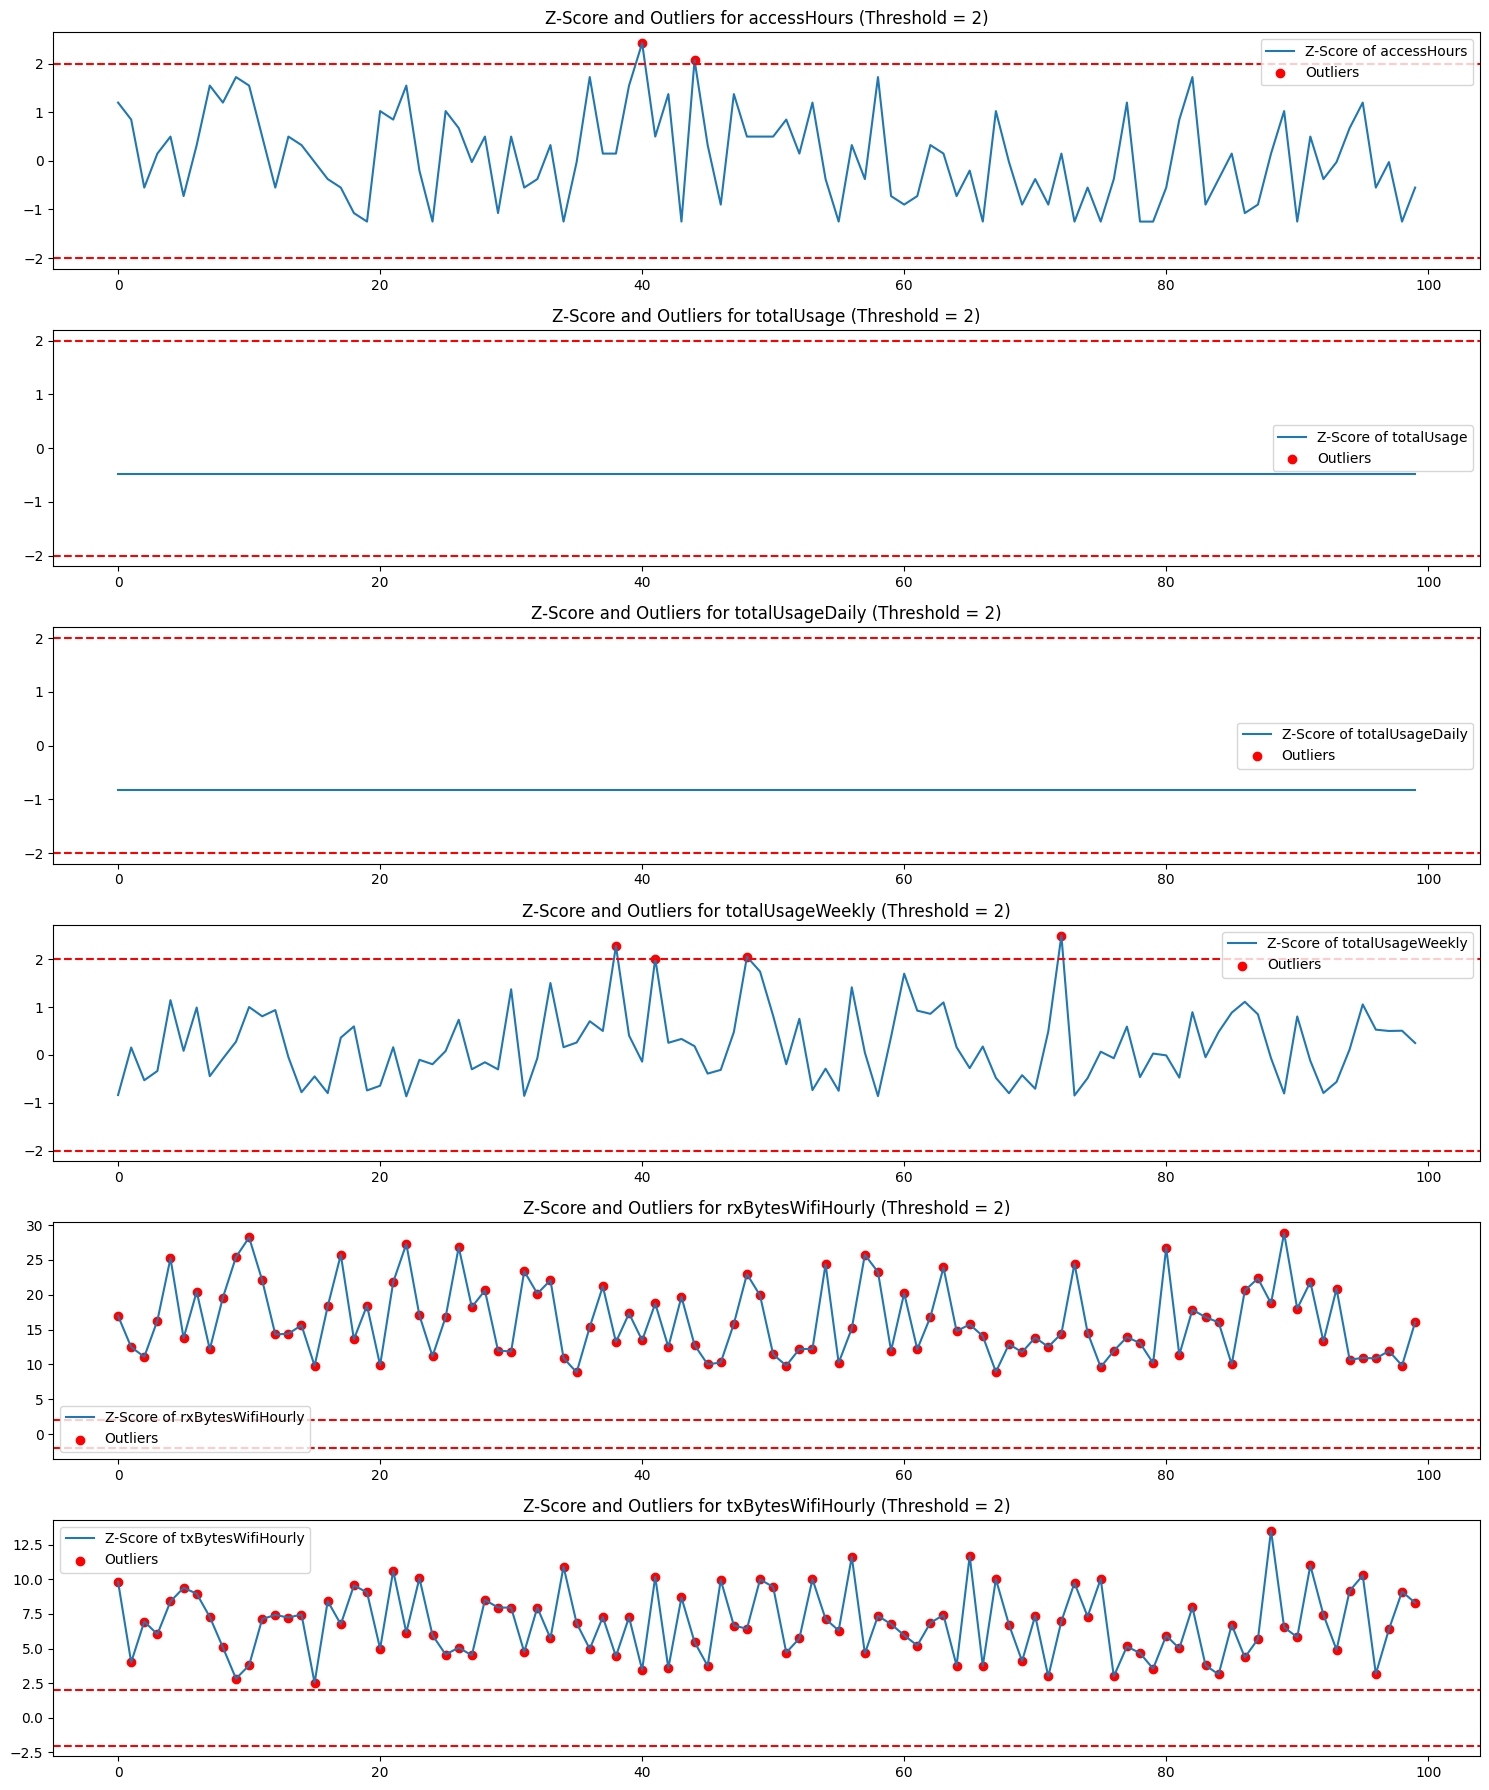

In [39]:

import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt

# Load the data
# Load the dataset
file_path = '../sanchit/synthetic_anomaly_data.csv'
data = pd.read_csv(file_path)

data.head()
# Selecting relevant columns
columns_of_interest = ['accessHours', 'totalUsage', 'totalUsageDaily','totalUsageWeekly','rxBytesWifiHourly','txBytesWifiHourly']

# Checking for the existence of columns
existing_columns = [col for col in columns_of_interest if col in data.columns]

# Filtering the dataset to include only the existing columns of interest
filtered_data = data[existing_columns]

# Calculating z-scores
z_scores = z_score(data,mu,std)

outliers_threshold_2 = (z_scores > 2) | (z_scores < -2)

# Plotting outliers with the new threshold
plt.figure(figsize=(15, 18))
for i, column in enumerate(existing_columns):
    plt.subplot(len(existing_columns), 1, i + 1)
    plt.plot(z_scores[column], label=f'Z-Score of {column}')
    plt.scatter(outliers_threshold_2[column].index[outliers_threshold_2[column]], z_scores[column][outliers_threshold_2[column]], color='red', label='Outliers')
    plt.axhline(y=2, color='r', linestyle='--')
    plt.axhline(y=-2, color='r', linestyle='--')
    plt.title(f'Z-Score and Outliers for {column} (Threshold = 2)')
    plt.legend()

plt.tight_layout()
plt.show()
